<h1 style="text-align:center;font-size:50px;color:darkblue;">Modelling Module</h1>

## Imports

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# import tensorflow
# import keras
from joblib import dump, load
import pickle

In [2]:
Vectorizer=TfidfVectorizer()

## configurations

In [3]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12);

In [4]:
def vectorize_the_input(data):
    return Vectorizer.transform(data)

In [5]:
Regular_expression_definition_for_html_tags=re.compile('<.*?>')
Regular_expression_definition_for_digits=re.compile('\d+\s|\s\d+|\s\d+\s')
Regular_expression_definition_for_links=re.compile('http://\S+|https://\S+')
word_lemitizer=WordNetLemmatizer()
english_stop_words=stopwords.words('english')

In [6]:
def preprocessing_of_sentence(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text=Regular_expression_definition_for_html_tags.sub(r" ",text)
    text=Regular_expression_definition_for_digits.sub(r" ",text)
    text=Regular_expression_definition_for_links.sub(r" ",text)
    punctuations = [".","=","_","<",">",",","!","?","'",'"',":",";","*","-","/","+","%","$","#","@","(",")","[","]","{","}",'\n']
    for i in punctuations:
        text = text.replace(i," ")
    text=text.lower().split()
    text=[word_lemitizer.lemmatize(word) for word in text]
#     text=[word for word in text if len(word)>1]
    return text

In [7]:
class_list=[
"admiration",
"anger",
"annoyance",
"approval",
"confusion",
"curiosity",
"desire",
"disappointment",
"disapproval",
"disgust",
"embarrassment",
"excitement",
"fear",
"gratitude",
"joy",
"love",
"nervousness",
"optimism",
"pride",
"realization",
"relief",
"remorse",
"sadness",
"surprise",
]


In [8]:
Sentiment_Level_Grouped_Emotions={
    "positive": [
        "amusement", 
        "excitement", 
        "joy", 
        "love", 
        "desire", 
        "optimism", 
        "caring", 
        "pride", 
        "admiration", 
        "gratitude", 
        "relief", 
        "approval"
    ],
    "negative": [
        "fear", 
        "nervousness", 
        "remorse", 
        "embarrassment", 
        "disappointment", 
        "sadness", 
        "grief", 
        "disgust", 
        "anger", 
        "annoyance", 
        "disapproval"
    ],
    "ambiguous": [
        "realization", 
        "surprise", 
        "curiosity", 
        "confusion"
    ]
}

In [9]:
Intermediate_Grouped_Emotions={
    "anger": [
        "anger", 
        "annoyance", 
        "disapproval"
    ],
    "disgust": ["disgust"],
    "fear": [
        "fear", 
        "nervousness"
    ],
    "joy": [
        "joy", 
        "amusement", 
        "approval", 
        "excitement", 
        "gratitude",  
        "love", 
        "optimism", 
        "relief", 
        "pride", 
        "admiration", 
        "desire", 
        "caring"
    ],
    "sadness": [
        "sadness", 
        "disappointment", 
        "embarrassment", 
        "grief",  
        "remorse"
    ],
    "surprise": [
        "surprise", 
        "realization", 
        "confusion", 
        "curiosity"
    ]
}

In [10]:
def getIntermediateEmotions(result):
    for key in Intermediate_Grouped_Emotions.keys():
        if result in Intermediate_Grouped_Emotions[key]:
            return key
    return "Neutral"
def getSentimentLevelEmotions(result):
    for key in Sentiment_Level_Grouped_Emotions.keys():
        if result in Sentiment_Level_Grouped_Emotions[key]:
            return key
    return "Neutral"
def getArrayofIntermediateEmotions(result):
    output=[]
    for value in result:
        for key in Intermediate_Grouped_Emotions.keys():
            if value in Intermediate_Grouped_Emotions[key]:
                output.append(key)
    return output
def getArrayofSentimentLevelEmotions(result):
    output=[]
    for value in result:
        for key in Sentiment_Level_Grouped_Emotions.keys():
            if value in Sentiment_Level_Grouped_Emotions[key]:
                output.append(key)
    return output

In [11]:
text_column='text';
label_column='label';

In [12]:
Training_FileName="Preprocessed_Training.csv";
Testing_FileName="Preprocessed_Testing.csv";

In [13]:
Training_Data=pandas.read_csv("../Data/Preprocessed_Data/"+Training_FileName);
Testing_Data=pandas.read_csv("../Data/Preprocessed_Data/"+Testing_FileName);

In [14]:
Tranin_features=Training_Data[text_column]
Training_Labels=Training_Data[label_column]
Testing_Features=Testing_Data[text_column]
Testing_Labels=Testing_Data[label_column]

In [15]:
Sentiment_Level_Emotion_Training_Labels=getArrayofSentimentLevelEmotions(Training_Labels)
Sentiment_Level_Emotion_Testing_Labels=getArrayofSentimentLevelEmotions(Testing_Labels)
Intermediate_Training_Emotions=getArrayofIntermediateEmotions(Training_Labels)
Intermediate_Testing_Emotions=getArrayofIntermediateEmotions(Testing_Labels)

# Data Exploration

In [16]:
Training_Data

,text,label
0,that game hurt,sadness
1,man i love reddit,love
2,right considering it’s such an important docum...,gratitude
3,he isn t a big but he s still quite popular i ...,disapproval
4,i wanted to downvote this but it s not your fa...,disappointment
...,...,...
176773,it s about fucking time hope this is real,annoyance
176774,it s about fucking time hope this is real,desire
176775,this is great can anyone make a request with y...,admiration
176776,i’m sorry can you please explain what are the ...,curiosity


In [17]:
Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176778 entries, 0 to 176777
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    176778 non-null  object
 1   label   176778 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [18]:
Training_Data.describe()

,text,label
count,176778,176778
unique,32379,24
top,thank you,approval
freq,168,17784


In [19]:
Testing_Data

,text,label
0,why the fuck is bayless isoing,annoyance
1,to make her feel threatened,joy
2,dirty southern wanker,approval
3,yes i heard abt the f bomb that ha to be why t...,love
4,damn youtube and outrage drama is super lucrat...,admiration
...,...,...
24341,i would love a game with either of these two n...,pride
24342,that’s what i’m thinking too so i may just go ...,love
24343,thanks i wa diagnosed with bp after the hospit...,love
24344,well that make sense,confusion


In [20]:
Testing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24346 entries, 0 to 24345
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24346 non-null  object
 1   label   24346 non-null  object
dtypes: object(2)
memory usage: 380.5+ KB


In [21]:
Testing_Data.describe()

,text,label
count,24346,24346
unique,24003,24
top,thank you,admiration
freq,46,3058


# Vectorization

In [22]:
Vectorizer.fit_transform(Training_Data[text_column])

<176778x19657 sparse matrix of type '<class 'numpy.float64'>'
	with 2105490 stored elements in Compressed Sparse Row format>

In [49]:
with open("../Model/Vectorizer.pickle","wb") as f:
    pickle.dump(Vectorizer,f)

In [23]:
Training_Vector_Data=Vectorizer.transform(Tranin_features)
Testing_Vector_Data=Vectorizer.transform(Testing_Features)

# Input Preparation

In [24]:
input_="Today is a my worst day, and it became more worst after this interview"
input_=preprocessing_of_sentence(input_)
print(input_)
input_=vectorize_the_input([" ".join(input_)])

['today', 'is', 'a', 'my', 'worst', 'day', 'and', 'it', 'became', 'more', 'worst', 'after', 'this', 'interview']


<h1 style="text-align:center;font-size:40px;color:darkblue;">Applying Machine Learning Algorithms 👇</h1>

# 1. SVM

In [25]:
svmModel=LinearSVC()

In [26]:
svmModel.fit(Training_Vector_Data,Training_Labels)

LinearSVC()

In [27]:
svm_training_predictions=svmModel.predict(Training_Vector_Data)
svm_Prediction=svmModel.predict(Testing_Vector_Data)

### Training Evaluation

                precision    recall  f1-score   support

    admiration       0.61      0.70      0.65     16941
         anger       0.60      0.66      0.63      7767
     annoyance       0.56      0.54      0.55     13329
      approval       0.60      0.58      0.59     17784
     confusion       0.63      0.60      0.61      7413
     curiosity       0.62      0.62      0.62      9801
        desire       0.61      0.58      0.60      3744
disappointment       0.58      0.45      0.51      8313
   disapproval       0.60      0.63      0.61     11322
       disgust       0.58      0.52      0.55      5112
 embarrassment       0.58      0.53      0.56      2451
    excitement       0.59      0.45      0.51      5700
          fear       0.60      0.68      0.64      3144
     gratitude       0.69      0.82      0.75     11589
           joy       0.59      0.57      0.58      7821
          love       0.64      0.78      0.70      8235
   nervousness       0.58      0.47      0.52  

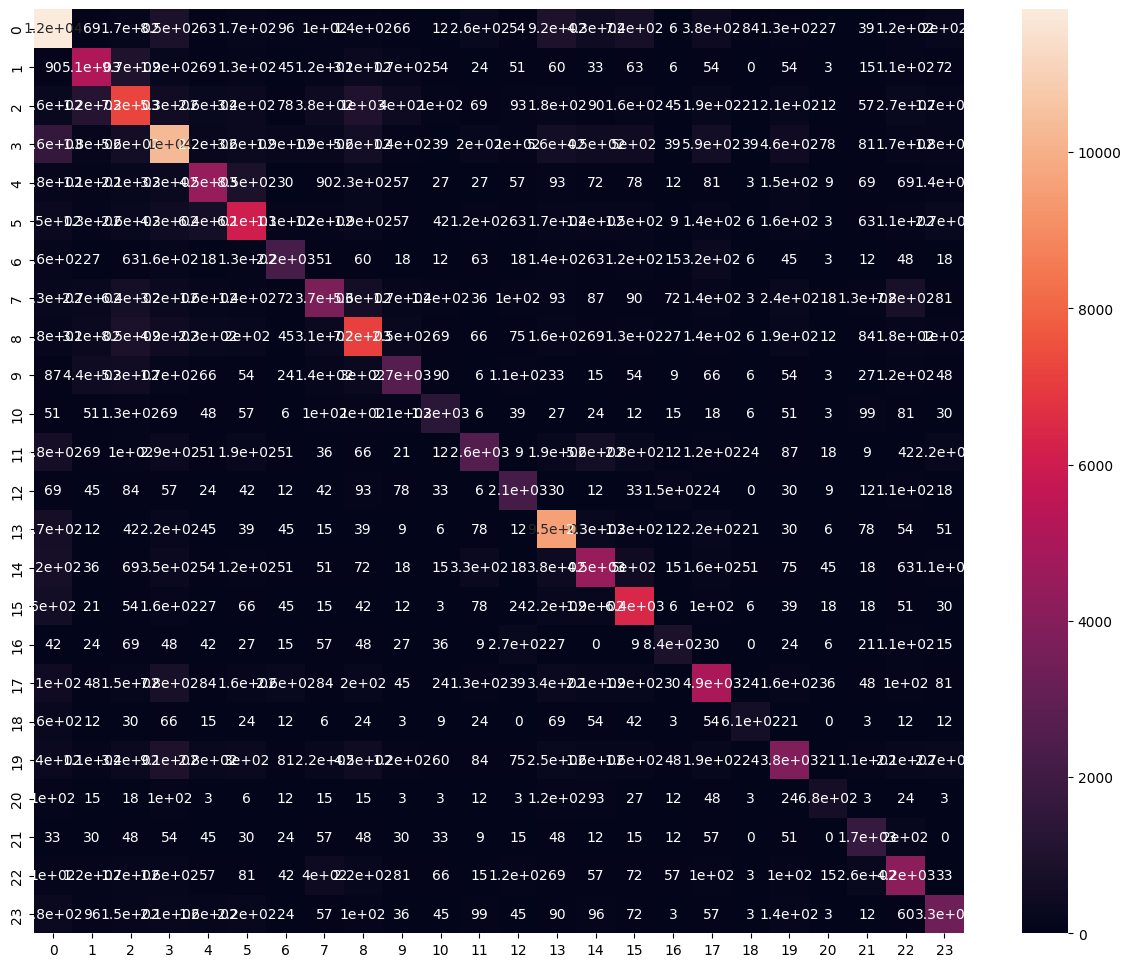

In [28]:
seaborn.heatmap(confusion_matrix(Training_Labels,svm_training_predictions),annot=True)
print(classification_report(Training_Labels,svm_training_predictions))

### Testing Evaluation

                precision    recall  f1-score   support

    admiration       0.72      0.74      0.73      3058
         anger       0.04      0.03      0.04      1838
     annoyance       0.08      0.12      0.10      1156
      approval       0.04      0.06      0.04      1645
     confusion       0.06      0.03      0.04      2109
     curiosity       0.02      0.03      0.02       735
        desire       0.01      0.00      0.00       955
disappointment       0.02      0.01      0.01      1565
   disapproval       0.01      0.02      0.01       445
       disgust       0.02      0.02      0.02       797
 embarrassment       0.04      0.01      0.01      1597
    excitement       0.00      0.00      0.00       574
          fear       0.00      0.01      0.01       226
     gratitude       0.01      0.02      0.01       567
           joy       0.00      0.01      0.00       495
          love       0.00      0.00      0.00      2117
   nervousness       0.00      0.00      0.00  

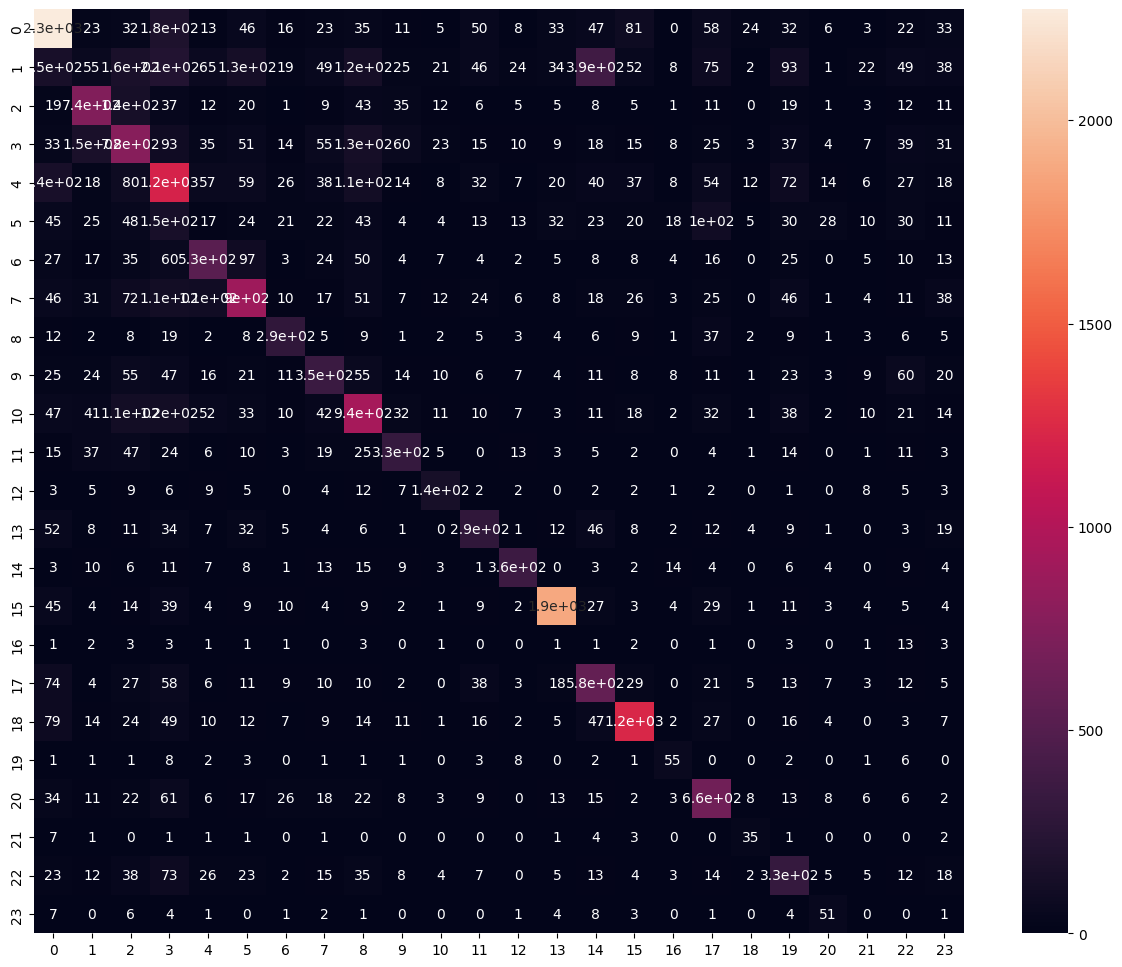

In [29]:
seaborn.heatmap(confusion_matrix(Testing_Labels,svm_Prediction),annot=True)
print(classification_report(Testing_Labels,svm_Prediction))

              precision    recall  f1-score   support

       anger       0.27      0.37      0.31      3439
     disgust       0.02      0.02      0.02       797
        fear       0.00      0.01      0.01       267
         joy       0.67      0.69      0.68     12912
     sadness       0.11      0.04      0.06      3895
    surprise       0.08      0.10      0.09      3036

    accuracy                           0.44     24346
   macro avg       0.19      0.20      0.19     24346
weighted avg       0.42      0.44      0.42     24346



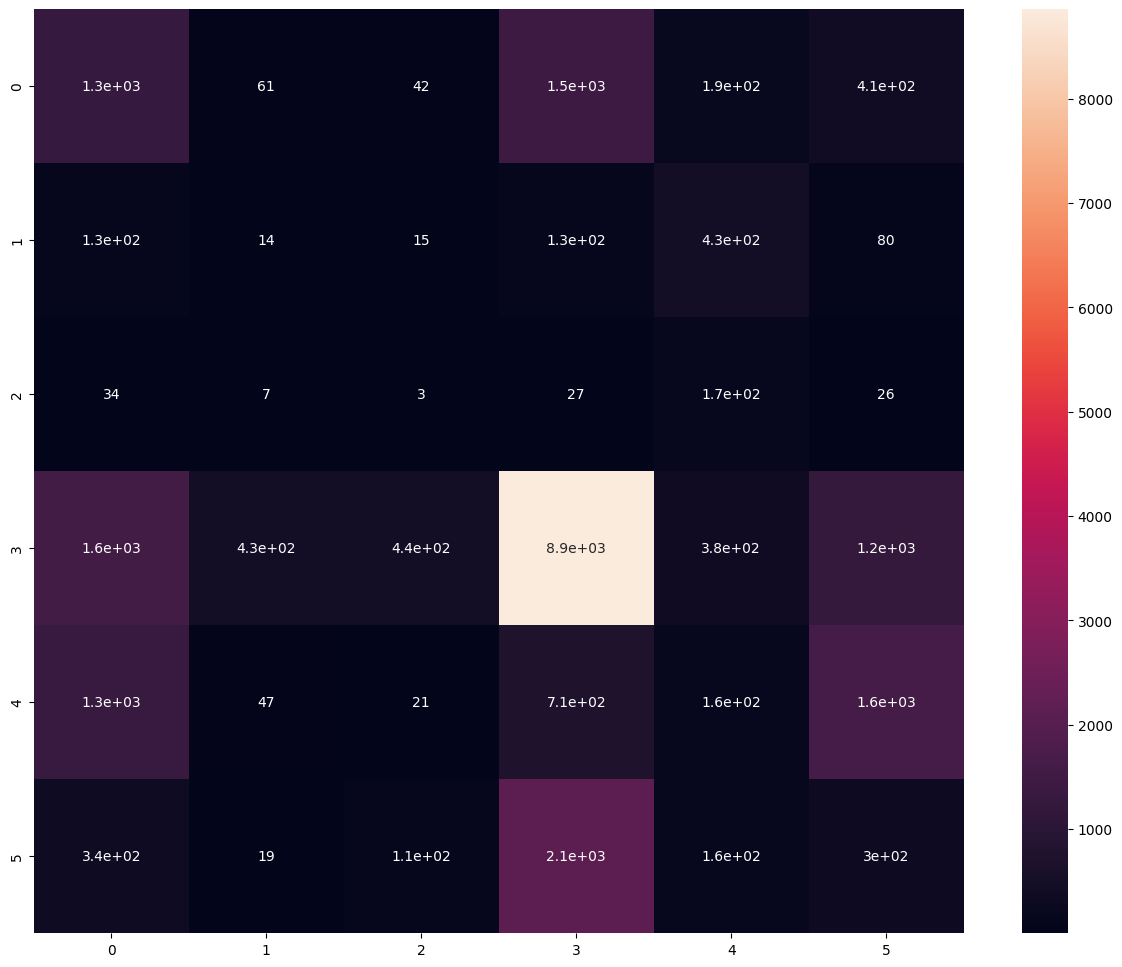

In [30]:
seaborn.heatmap(confusion_matrix(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(svm_Prediction)),annot=True)
print(classification_report(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(svm_Prediction)))

              precision    recall  f1-score   support

   ambiguous       0.08      0.10      0.09      3036
    negative       0.53      0.47      0.50      8398
    positive       0.67      0.69      0.68     12912

    accuracy                           0.54     24346
   macro avg       0.43      0.42      0.42     24346
weighted avg       0.55      0.54      0.54     24346



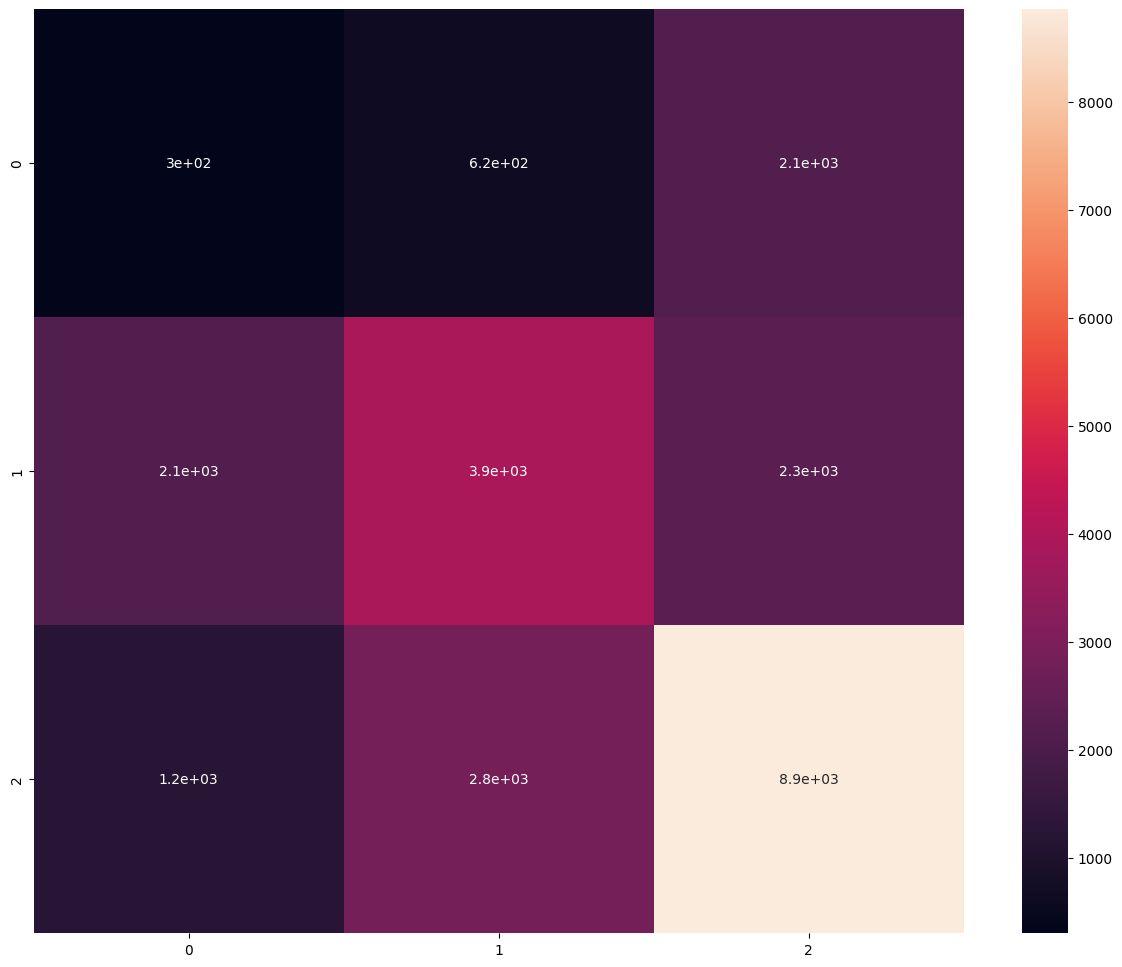

In [31]:
seaborn.heatmap(confusion_matrix(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(svm_Prediction)),annot=True)
print(classification_report(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(svm_Prediction)))

### Realtime input Testing

In [32]:
svmModel.predict(input_)[0]

'disgust'

In [33]:
getIntermediateEmotions(svmModel.predict(input_)[0])

'disgust'

In [34]:
getSentimentLevelEmotions(svmModel.predict(input_)[0])

'negative'

In [44]:
dump(svmModel, './Models/svmModel.joblib')

['./Models/svmModel.joblib']

## Logistic Regression

In [35]:
LogisticModel=LogisticRegression()

In [36]:
LogisticModel.fit(Training_Vector_Data,Training_Labels)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
logistic_training_predictions=LogisticModel.predict(Training_Vector_Data)
logistic_Prediction=LogisticModel.predict(Testing_Vector_Data)

### Training Evaluation

                precision    recall  f1-score   support

    admiration       0.61      0.70      0.65     16941
         anger       0.60      0.66      0.63      7767
     annoyance       0.56      0.54      0.55     13329
      approval       0.60      0.58      0.59     17784
     confusion       0.63      0.60      0.61      7413
     curiosity       0.62      0.62      0.62      9801
        desire       0.61      0.58      0.60      3744
disappointment       0.58      0.45      0.51      8313
   disapproval       0.60      0.63      0.61     11322
       disgust       0.58      0.52      0.55      5112
 embarrassment       0.58      0.53      0.56      2451
    excitement       0.59      0.45      0.51      5700
          fear       0.60      0.68      0.64      3144
     gratitude       0.69      0.82      0.75     11589
           joy       0.59      0.57      0.58      7821
          love       0.64      0.78      0.70      8235
   nervousness       0.58      0.47      0.52  

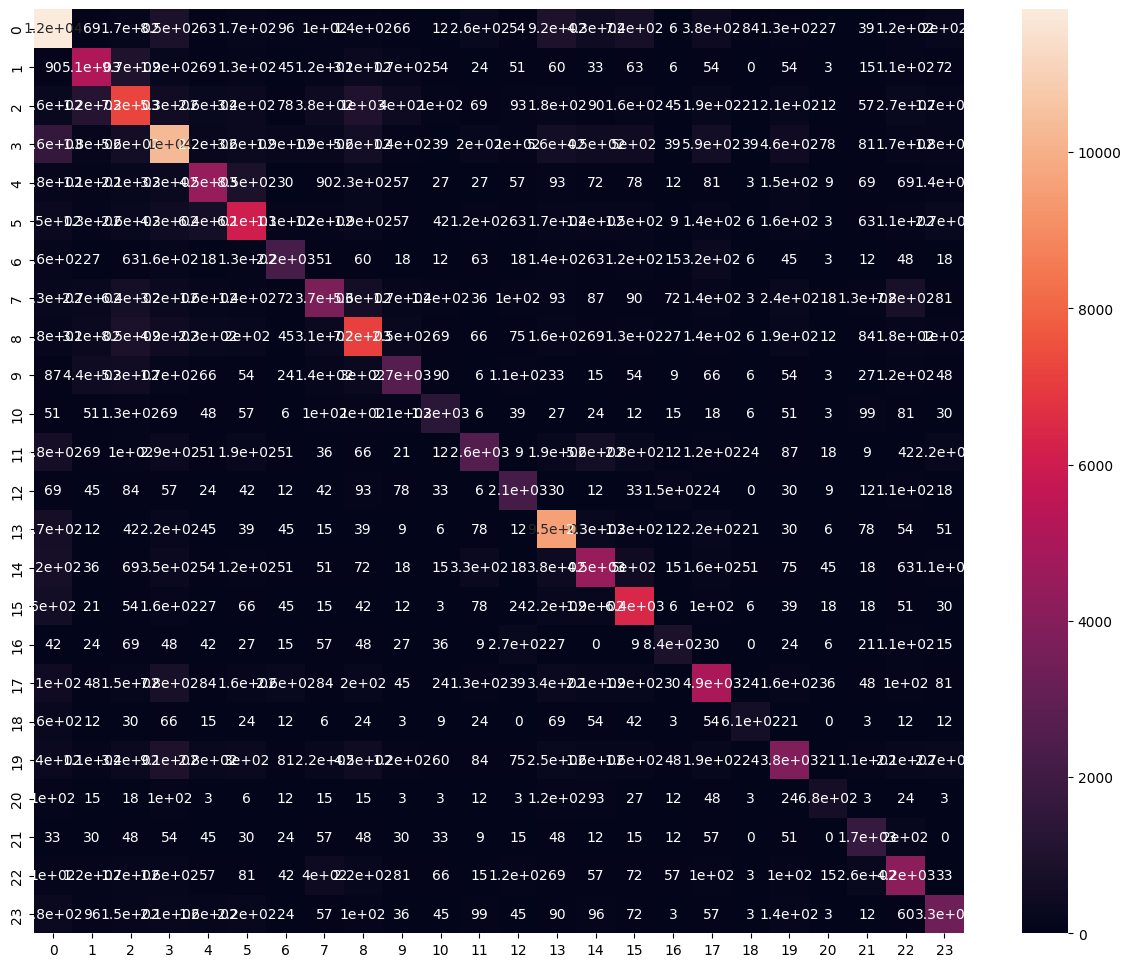

In [38]:
seaborn.heatmap(confusion_matrix(Training_Labels,logistic_training_predictions),annot=True)
print(classification_report(Training_Labels,logistic_training_predictions))

### Testing Evaluation

                precision    recall  f1-score   support

    admiration       0.72      0.74      0.73      3058
         anger       0.04      0.03      0.04      1838
     annoyance       0.08      0.12      0.10      1156
      approval       0.04      0.06      0.04      1645
     confusion       0.06      0.03      0.04      2109
     curiosity       0.02      0.03      0.02       735
        desire       0.01      0.00      0.00       955
disappointment       0.02      0.01      0.01      1565
   disapproval       0.01      0.02      0.01       445
       disgust       0.02      0.02      0.02       797
 embarrassment       0.04      0.01      0.01      1597
    excitement       0.00      0.00      0.00       574
          fear       0.00      0.01      0.01       226
     gratitude       0.01      0.02      0.01       567
           joy       0.00      0.01      0.00       495
          love       0.00      0.00      0.00      2117
   nervousness       0.00      0.00      0.00  

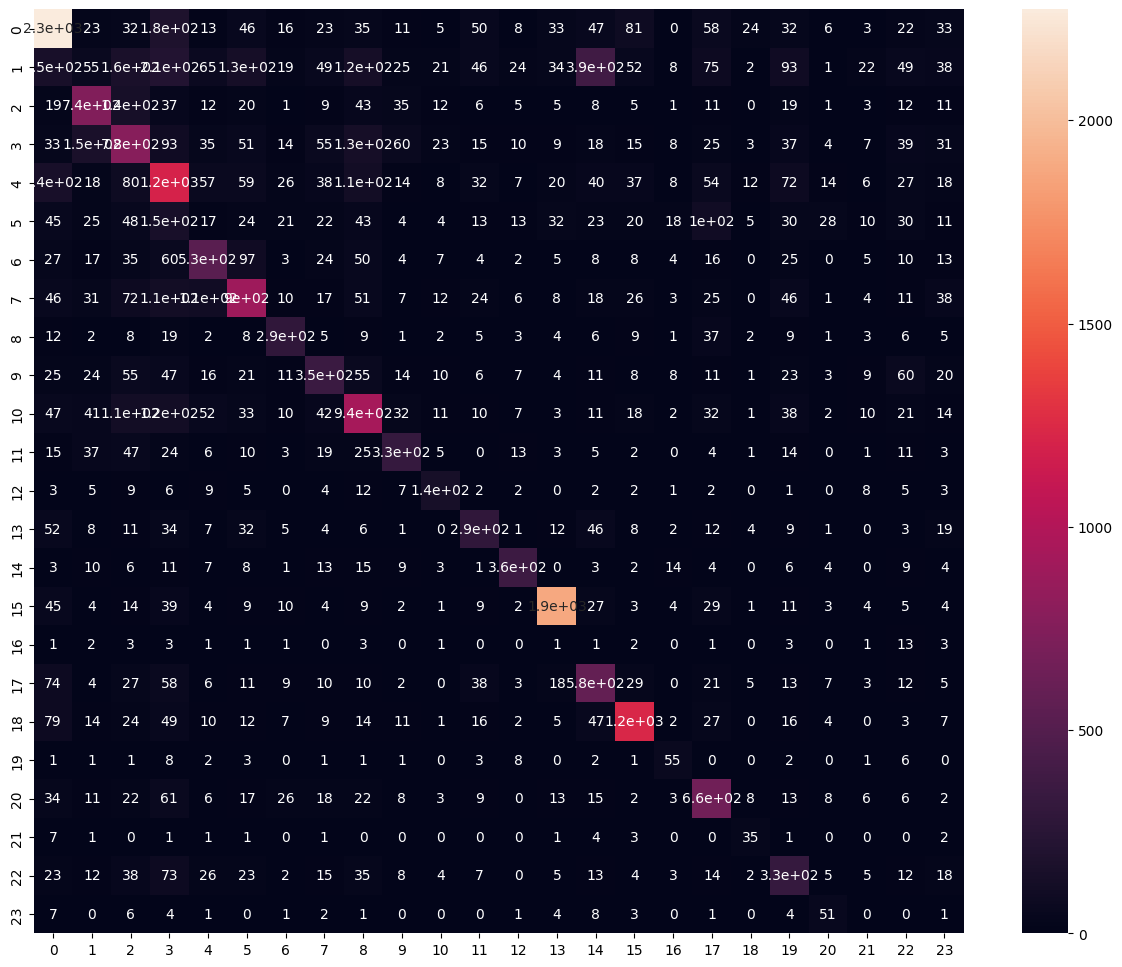

In [39]:
seaborn.heatmap(confusion_matrix(Testing_Labels,logistic_Prediction),annot=True)
print(classification_report(Testing_Labels,logistic_Prediction))

              precision    recall  f1-score   support

       anger       0.27      0.37      0.31      3439
     disgust       0.02      0.02      0.02       797
        fear       0.00      0.01      0.01       267
         joy       0.67      0.69      0.68     12912
     sadness       0.11      0.04      0.06      3895
    surprise       0.08      0.10      0.09      3036

    accuracy                           0.44     24346
   macro avg       0.19      0.20      0.19     24346
weighted avg       0.42      0.44      0.42     24346



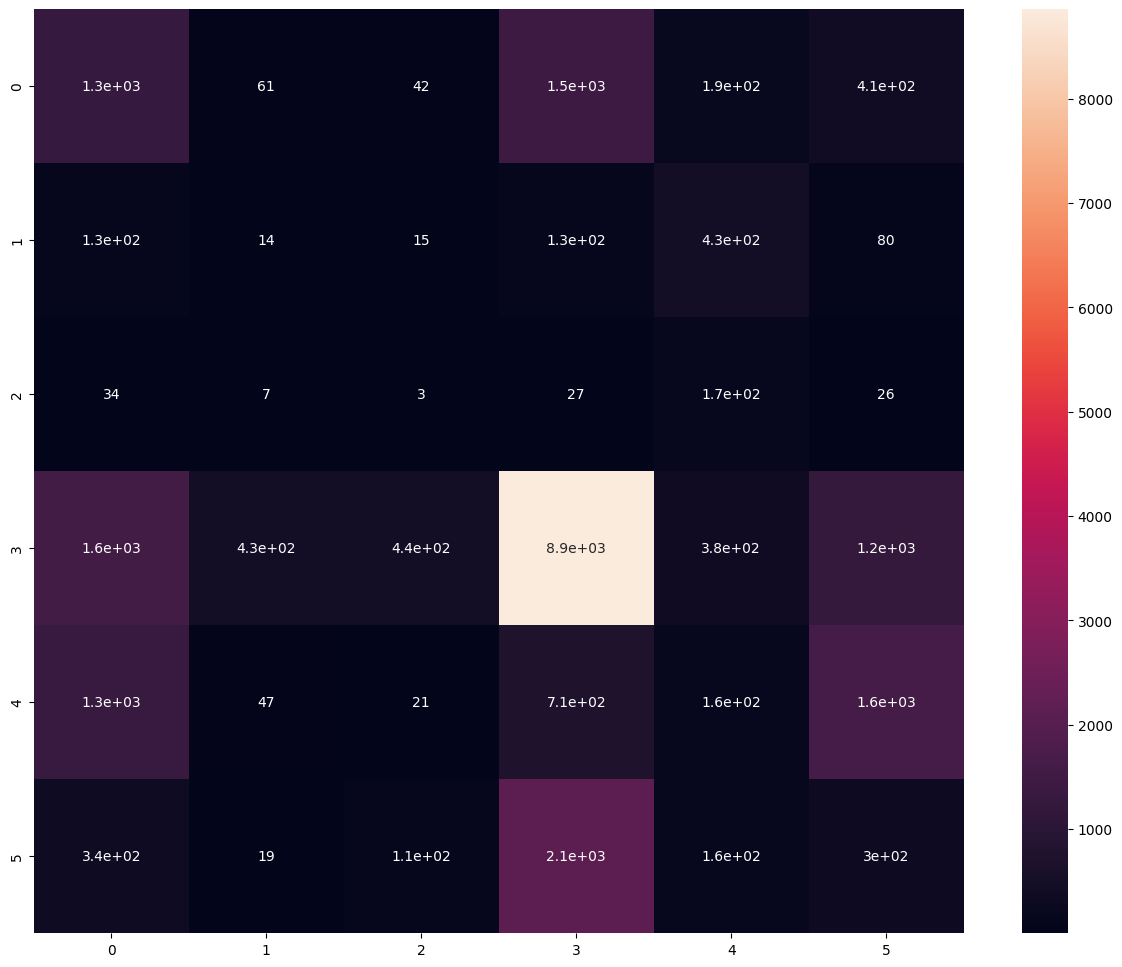

In [40]:
seaborn.heatmap(confusion_matrix(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(logistic_Prediction)),annot=True)
print(classification_report(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(logistic_Prediction)))

              precision    recall  f1-score   support

   ambiguous       0.08      0.10      0.09      3036
    negative       0.53      0.47      0.50      8398
    positive       0.67      0.69      0.68     12912

    accuracy                           0.54     24346
   macro avg       0.43      0.42      0.42     24346
weighted avg       0.55      0.54      0.54     24346



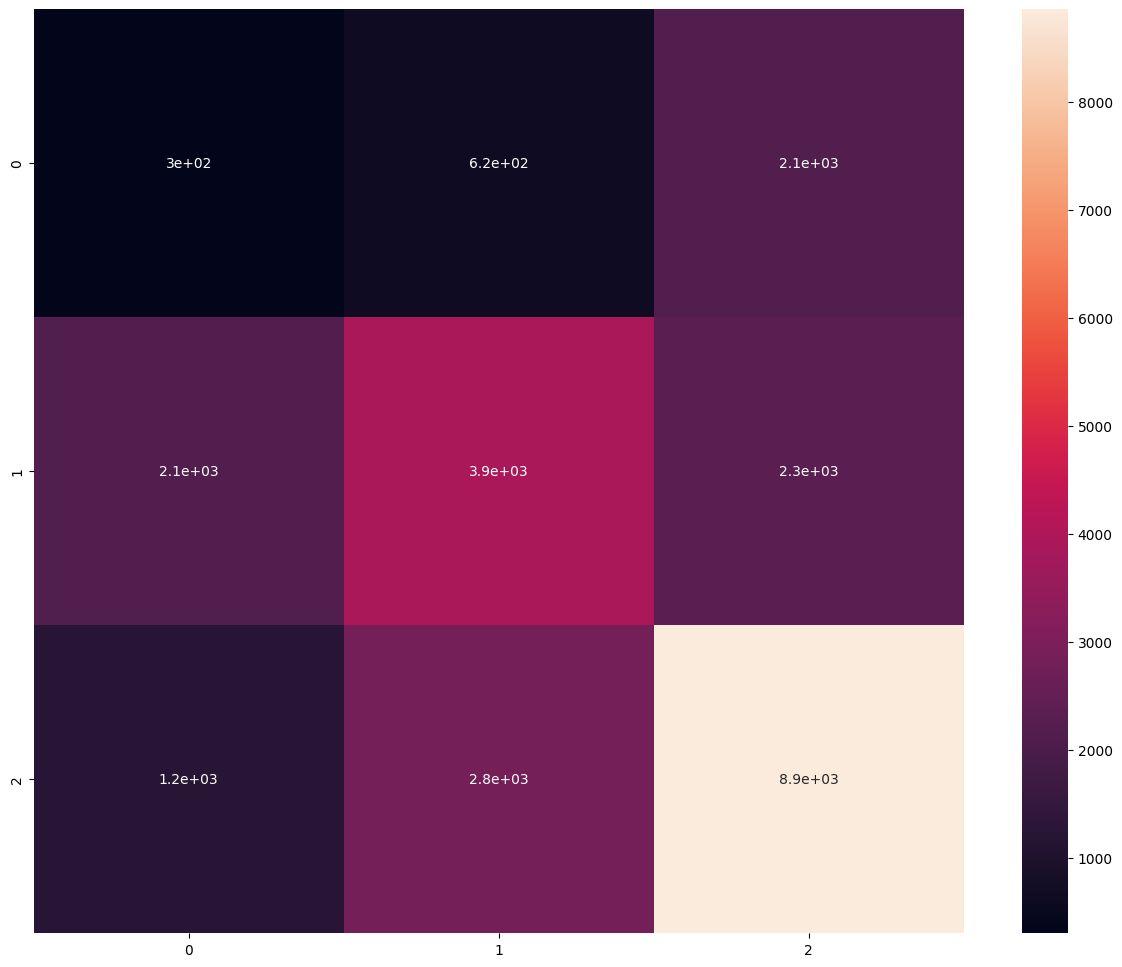

In [41]:
seaborn.heatmap(confusion_matrix(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(logistic_Prediction)),annot=True)
print(classification_report(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(logistic_Prediction)))

### Realtime input Testing

In [42]:
LogisticModel.predict(input_)[0]

'disgust'

In [43]:
getIntermediateEmotions(LogisticModel.predict(input_)[0])

'disgust'

In [44]:
getSentimentLevelEmotions(LogisticModel.predict(input_)[0])

'negative'

In [45]:
dump(LogisticModel, './Models/LogisticModel.joblib')

['./Models/LogisticModel.joblib']

## Multinomial Naive Bayes

In [47]:
multinomialNBModel=MultinomialNB()

In [48]:
multinomialNBModel.fit(Training_Vector_Data,Training_Labels)

MultinomialNB()

In [49]:
multinomialNBModel_training_predictions=multinomialNBModel.predict(Training_Vector_Data)
multinomialNBModel_Prediction=multinomialNBModel.predict(Testing_Vector_Data)

### Training Evaluation

C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

                precision    recall  f1-score   support

    admiration       0.38      0.77      0.51     16941
         anger       0.67      0.29      0.40      7767
     annoyance       0.35      0.61      0.44     13329
      approval       0.25      0.77      0.37     17784
     confusion       0.67      0.21      0.32      7413
     curiosity       0.56      0.42      0.48      9801
        desire       0.77      0.06      0.11      3744
disappointment       0.54      0.22      0.31      8313
   disapproval       0.50      0.44      0.47     11322
       disgust       0.69      0.12      0.21      5112
 embarrassment       0.87      0.02      0.03      2451
    excitement       0.73      0.11      0.19      5700
          fear       0.76      0.10      0.18      3144
     gratitude       0.61      0.72      0.66     11589
           joy       0.57      0.26      0.36      7821
          love       0.71      0.41      0.52      8235
   nervousness       0.67      0.00      0.01  

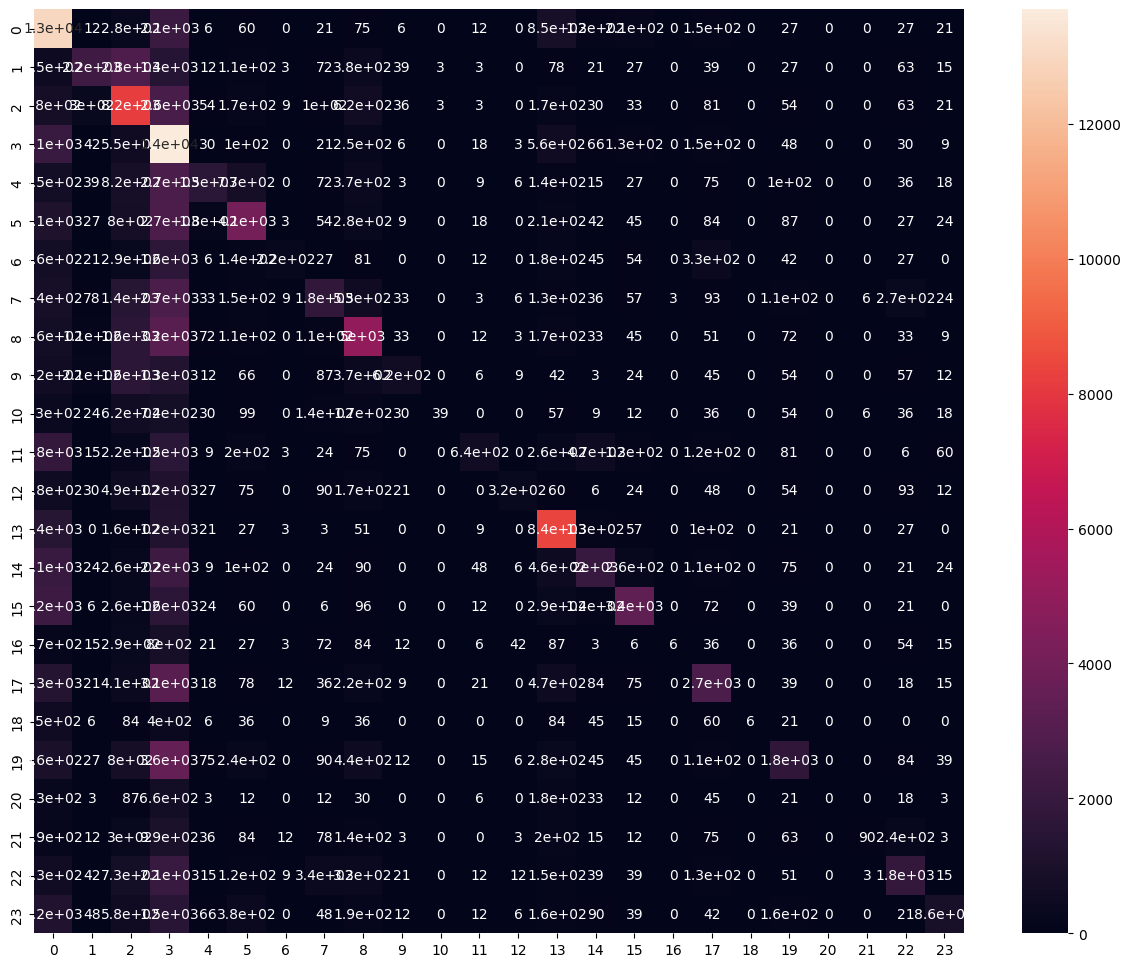

In [50]:
seaborn.heatmap(confusion_matrix(Training_Labels,multinomialNBModel_training_predictions),annot=True)
print(classification_report(Training_Labels,multinomialNBModel_training_predictions))

C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

                precision    recall  f1-score   support

    admiration       0.46      0.81      0.59      3058
         anger       0.01      0.00      0.00      1838
     annoyance       0.15      0.38      0.21      1156
      approval       0.05      0.26      0.09      1645
     confusion       0.01      0.00      0.00      2109
     curiosity       0.01      0.01      0.01       735
        desire       0.03      0.00      0.00       955
disappointment       0.02      0.00      0.01      1565
   disapproval       0.01      0.02      0.01       445
       disgust       0.02      0.00      0.00       797
 embarrassment       0.00      0.00      0.00      1597
    excitement       0.00      0.00      0.00       574
          fear       0.00      0.00      0.00       226
     gratitude       0.01      0.03      0.01       567
           joy       0.00      0.00      0.00       495
          love       0.00      0.00      0.00      2117
   nervousness       0.00      0.00      0.00  

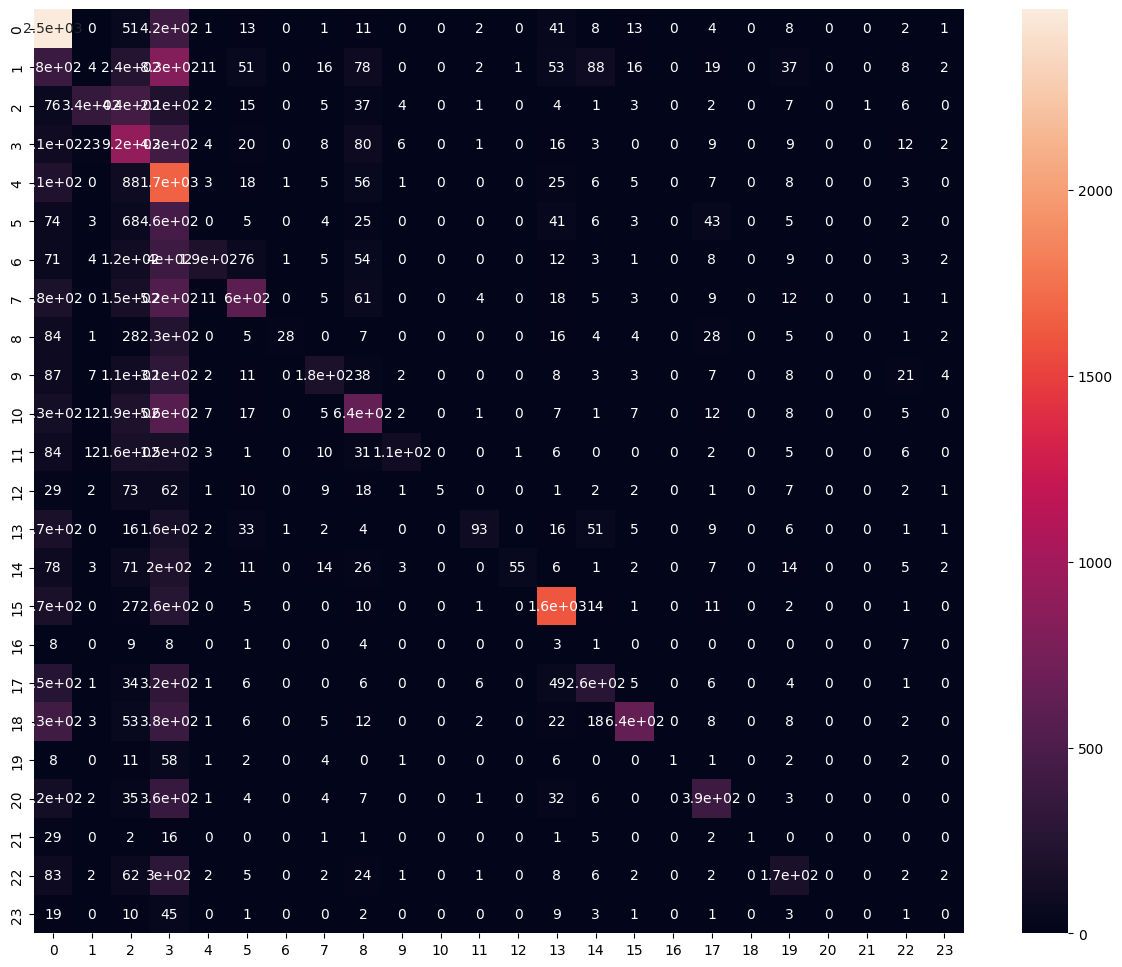

In [51]:
seaborn.heatmap(confusion_matrix(Testing_Labels,multinomialNBModel_Prediction),annot=True)
print(classification_report(Testing_Labels,multinomialNBModel_Prediction))

### Testing Evaluation

              precision    recall  f1-score   support

       anger       0.26      0.34      0.29      3439
     disgust       0.02      0.00      0.00       797
        fear       0.00      0.00      0.00       267
         joy       0.59      0.81      0.68     12912
     sadness       0.05      0.01      0.01      3895
    surprise       0.03      0.02      0.02      3036

    accuracy                           0.48     24346
   macro avg       0.16      0.20      0.17     24346
weighted avg       0.36      0.48      0.41     24346



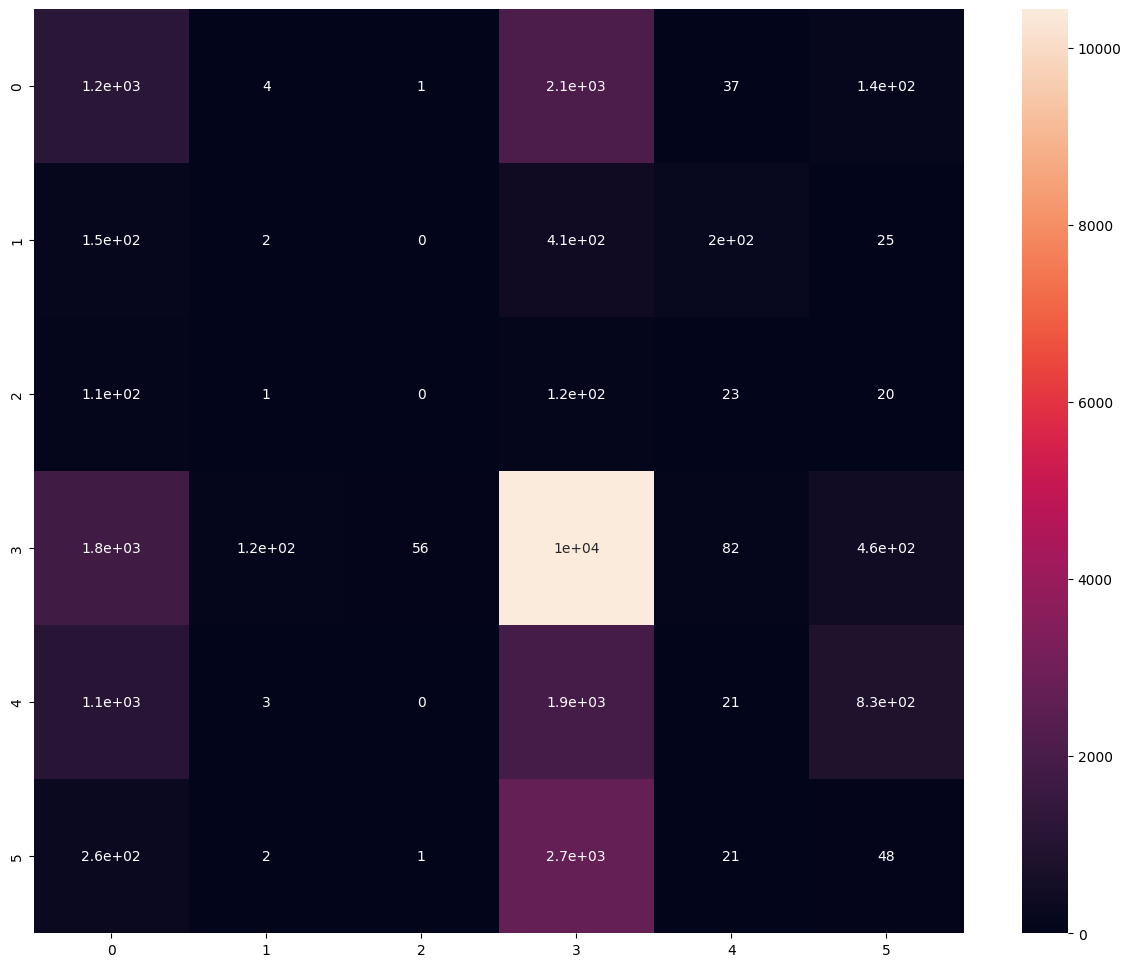

In [52]:
seaborn.heatmap(confusion_matrix(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(multinomialNBModel_Prediction)),annot=True)
print(classification_report(Intermediate_Testing_Emotions,getArrayofIntermediateEmotions(multinomialNBModel_Prediction)))

              precision    recall  f1-score   support

   ambiguous       0.03      0.02      0.02      3036
    negative       0.55      0.34      0.42      8398
    positive       0.59      0.81      0.68     12912

    accuracy                           0.55     24346
   macro avg       0.39      0.39      0.38     24346
weighted avg       0.51      0.55      0.51     24346



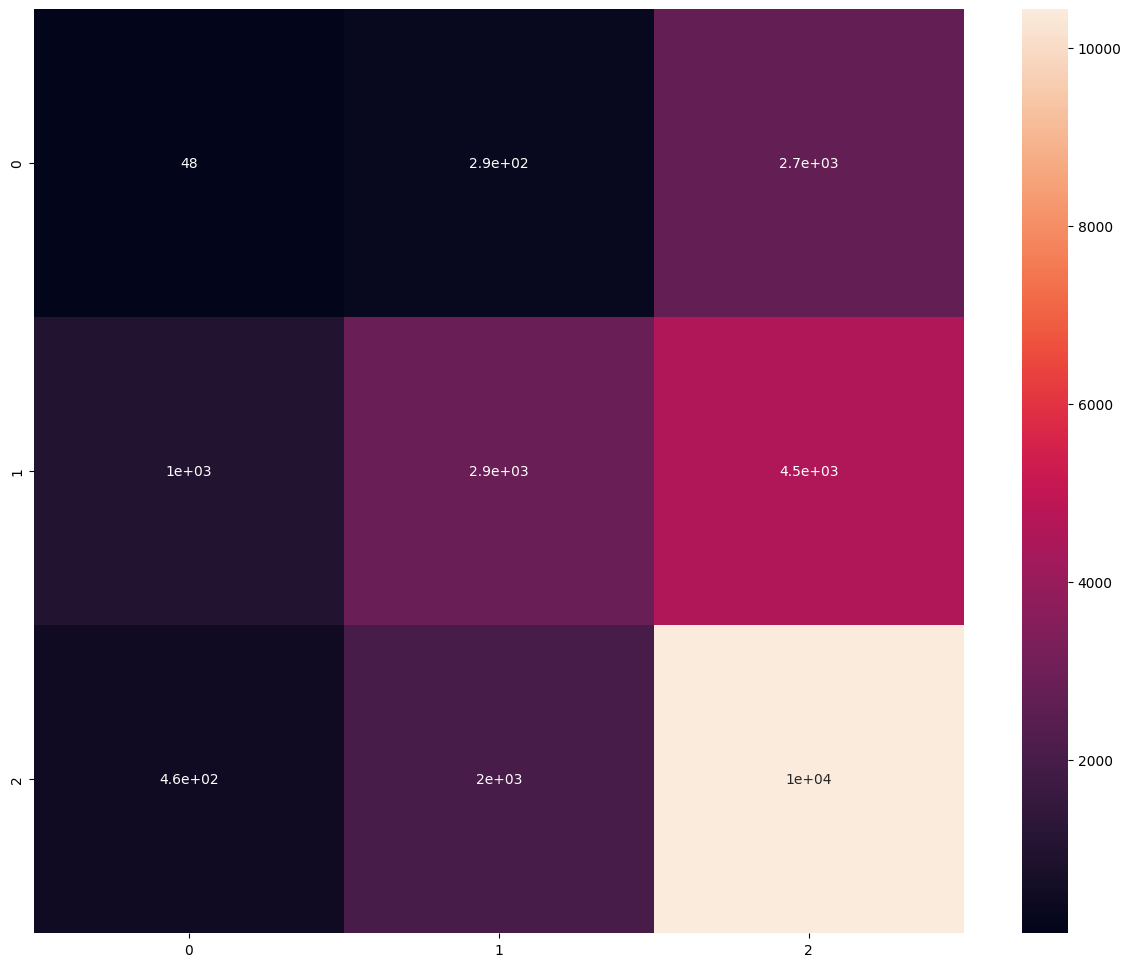

In [53]:
seaborn.heatmap(confusion_matrix(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(multinomialNBModel_Prediction)),annot=True)
print(classification_report(Sentiment_Level_Emotion_Testing_Labels,getArrayofSentimentLevelEmotions(multinomialNBModel_Prediction)))

### Realtime input Testing

In [54]:
multinomialNBModel.predict(input_)[0]

'annoyance'

In [55]:
getIntermediateEmotions(multinomialNBModel.predict(input_)[0])

'anger'

In [56]:
getSentimentLevelEmotions(multinomialNBModel.predict(input_)[0])

'negative'

In [57]:
dump(multinomialNBModel, './Models/multinomialNBModel.joblib')

['./Models/multinomialNBModel.joblib']

# Saving Final Choosed Model

In [45]:
final_model=svmModel

In [46]:
dump(final_model, '../Model/Model.joblib')

['../Model/Model.joblib']